# <span style='color:red'>Function Transformers</span>

In [1]:
import pandas as pd
import numpy as np

/tmp/ipykernel_54056/2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

/tmp/ipykernel_54056/2940318962.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace = True)


In [6]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [7]:
X = df.iloc[:, 1:3]
y = df.iloc[:, 0]

In [8]:
X

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [9]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [11]:
X_train.shape, X_test.shape

((623, 2), (268, 2))

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

/tmp/ipykernel_54056/2888751792.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


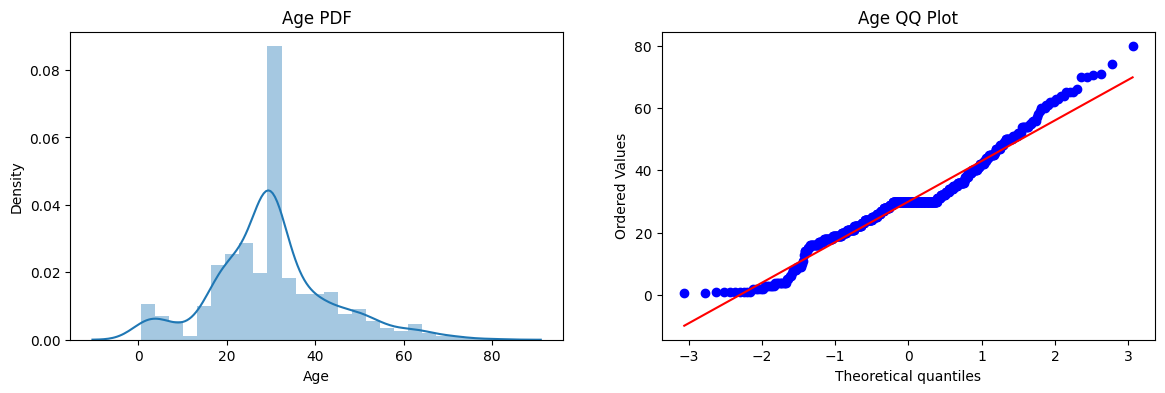

In [13]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

/tmp/ipykernel_54056/3305979007.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


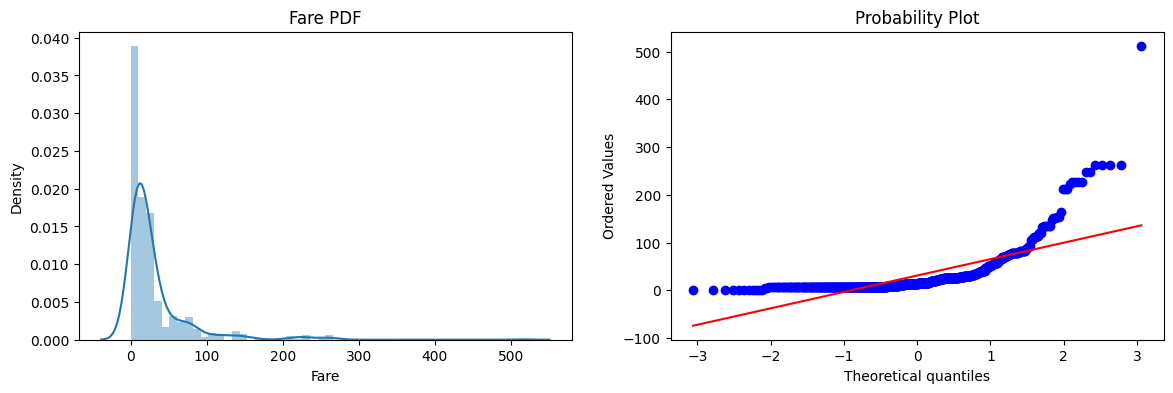

In [14]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
plt.title('Fare PDF')
sns.distplot(X_train['Fare'])

plt.subplot(122)
plt.title('Fare QQ Plot')
stats.probplot(X_train['Fare'], dist='norm', plot = plt)

plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [16]:
mdl = LogisticRegression()
mdl2 = DecisionTreeClassifier()

mdl.fit(X_train, y_train)
mdl2.fit(X_train, y_train)

y_pred = mdl.predict(X_test)
y_pred1 = mdl2.predict(X_test)

print("Accuracy Score of LR", (accuracy_score(y_test, y_pred))*100, "%")
print("Accuracy Score of DT", (accuracy_score(y_test, y_pred1))*100, "%")

Accuracy Score of LR 61.940298507462686 %
Accuracy Score of DT 56.71641791044776 %


In [17]:
ftrf = FunctionTransformer(func = np.log1p)

In [18]:
X_train_transformed = ftrf.fit_transform(X_train)
X_test_transformed = ftrf.fit_transform(X_test)

In [19]:
mdl = LogisticRegression()
mdl2 = DecisionTreeClassifier()

mdl.fit(X_train_transformed, y_train)
mdl2.fit(X_train_transformed, y_train)

y_pred = mdl.predict(X_test)
y_pred1 = mdl2.predict(X_test)

print("Accuracy Score of LR", (accuracy_score(y_test, y_pred))*100, "%")
print("Accuracy Score of DT", (accuracy_score(y_test, y_pred1))*100, "%")

Accuracy Score of LR 63.059701492537314 %
Accuracy Score of DT 57.08955223880597 %


In [20]:
X_transformed = ftrf.fit_transform(X)

mdl = LogisticRegression()
mdl2 = DecisionTreeClassifier()

print("Accuracy Score of LR", (np.mean((cross_val_score(mdl, X_transformed, y, scoring='accuracy', cv=10)))*100, "%"))
print("Accuracy Score of DT", (np.mean((cross_val_score(mdl2, X_transformed, y, scoring='accuracy', cv=10)))*100, "%"))

Accuracy Score of LR (67.80274656679151, '%')
Accuracy Score of DT (65.55181023720348, '%')


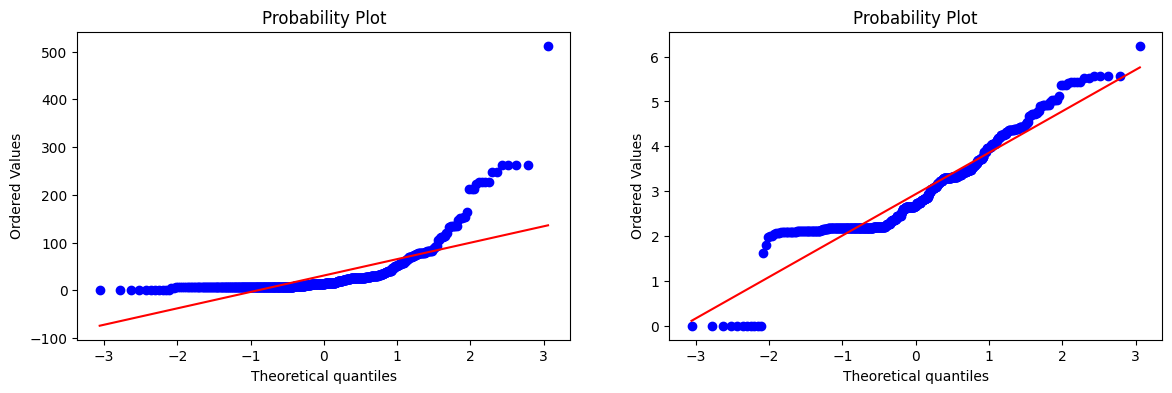

In [21]:
plt.figure(figsize = (14, 4))

plt.subplot(121)
plt.title("Fare before Transformation")
stats.probplot(X_train['Fare'], dist='norm', plot=plt)

plt.subplot(122)
plt.title("Fare after Transformation")
stats.probplot(X_train_transformed['Fare'], dist='norm', plot = plt)

plt.show()

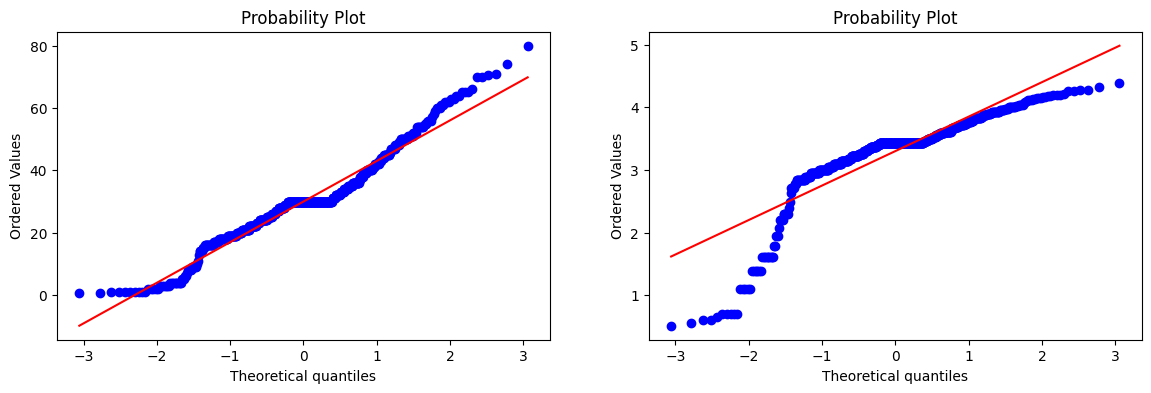

In [22]:
plt.figure(figsize = (14, 4))

plt.subplot(121)
plt.title("Age before Transformation")
stats.probplot(X_train['Age'], dist='norm', plot=plt)

plt.subplot(122)
plt.title("Age after Transformation")
stats.probplot(X_train_transformed['Age'], dist='norm', plot = plt)

plt.show()

## Creating a Column Transformer to implement the Function Transformer

In [23]:
ctrf = ColumnTransformer([('log', FunctionTransformer(func=np.log1p), ['Fare'])], remainder = 'passthrough')

X_train_transformed2 = ctrf.fit_transform(X_train)
X_test_transformed2 = ctrf.fit_transform(X_test)

In [24]:
mdl = LogisticRegression()
mdl2 = DecisionTreeClassifier()

mdl.fit(X_train_transformed2, y_train)
mdl2.fit(X_train_transformed2, y_train)

y_pred = mdl.predict(X_test)
y_pred1 = mdl2.predict(X_test)

print("Accuracy Score of LR", (accuracy_score(y_test, y_pred))*100, "%")
print("Accuracy Score of DT", (accuracy_score(y_test, y_pred1))*100, "%")

Accuracy Score of LR 42.53731343283582 %
Accuracy Score of DT 50.373134328358205 %


/home/unknown/.local/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/unknown/.local/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [25]:
X_transformed2 = ctrf.fit_transform(X)

mdl = LogisticRegression()
mdl2 = DecisionTreeClassifier()

print("Accuracy Score of LR", (np.mean((cross_val_score(mdl, X_transformed2, y, scoring='accuracy', cv=10)))*100, "%"))
print("Accuracy Score of DT", (np.mean((cross_val_score(mdl2, X_transformed2, y, scoring='accuracy', cv=10)))*100, "%"))

Accuracy Score of LR (67.12609238451937, '%')
Accuracy Score of DT (65.99750312109862, '%')


## Create a function to implement your desired Function Transformer

In [26]:
def applyFuncTransformer(transform):
    X = df.iloc[:, 1:3]
    y = df.iloc[:, 0]

    ctrf = ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], remainder = 'passthrough')

    X_trans = ctrf.fit_transform(X)

    lr = LogisticRegression()

    print("Accuracy = ", (np.mean(cross_val_score(lr, X_trans, y, scoring='accuracy', cv=10)))*100, "%")

    plt.figure(figsize= (14, 4))

    plt.subplot(121)
    
    plt.title("Fare before transform")
    stats.probplot(X['Fare'], dist='norm', plot = plt)

    plt.subplot(122)
    plt.title("Fare after Transform")
    stats.probplot(X_trans[:, 0], dist='norm', plot=plt)

    plt.show()
    

Accuracy =  61.951310861423224 %


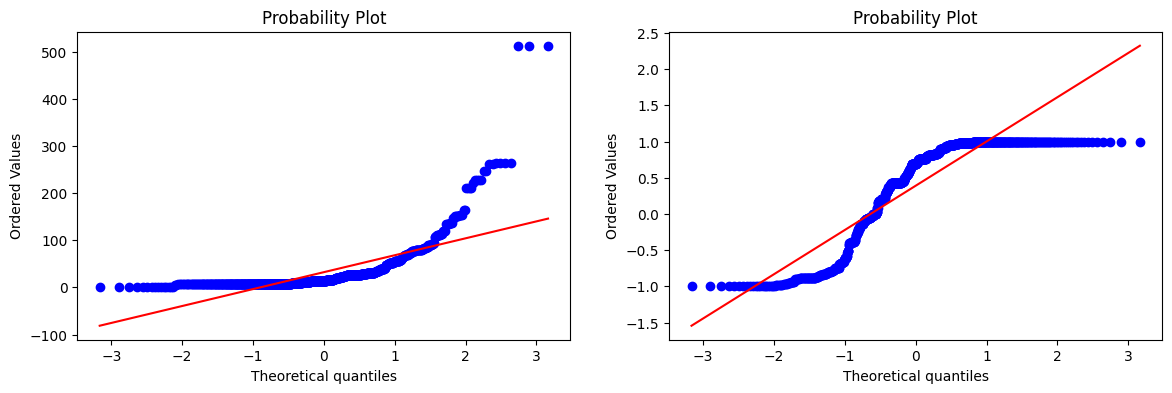

In [27]:
applyFuncTransformer(np.sin)